In [553]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import csv
import statistics 
from statistics import mean
from scipy import stats
import matplotlib.animation as ani
from pylab import rcParams
import cartopy.crs as ccrs
import cartopy.feature as cfeature


from cartopy import config
from cartopy.io import shapereader

In [168]:
conda install cartopy


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/osx-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/osx-64'



Note: you may need to restart the kernel to use updated packages.


In [169]:
pip install cartopy 

Note: you may need to restart the kernel to use updated packages.


-----------------------------------------------------------
-----------------------------------------------------------

In [58]:
#FLOW AND SEDIMENT DATA

In [124]:
RiverData=pd.read_csv('RiverData.csv', index_col='Year')
RiverData

,SSC,Flow
Year,,
1966.0,730.00,34.3
1967.0,907.60,72.8
1971.0,4110.00,78.0
1972.0,839.33,25.7
1973.0,535.88,94.7
...,...,...
2016.0,31.60,NaN
2017.0,36.40,NaN
2018.0,36.00,NaN


In [634]:
NewRiverData=RiverData.fillna(0)

In [126]:
SSC=RiverData['SSC']
SSC

Year
1966.0     730.00
1967.0     907.60
1971.0    4110.00
1972.0     839.33
1973.0     535.88
           ...   
2016.0      31.60
2017.0      36.40
2018.0      36.00
2019.0      42.80
2020.0      17.90
Name: SSC, Length: 11407, dtype: float64

In [127]:
SSC_max=np.max(SSC)
SSC_max

4110.0

In [ ]:
index=SSC.index(SSC_max)
print(index)

In [129]:
Flow=RiverData['Flow']
Flow

Year
1966.0    34.3
1967.0    72.8
1971.0    78.0
1972.0    25.7
1973.0    94.7
          ... 
2016.0     NaN
2017.0     NaN
2018.0     NaN
2019.0     NaN
2020.0     NaN
Name: Flow, Length: 11407, dtype: float64

In [130]:
np.max(Flow)

103.1

-----------------------------------------------------------
-----------------------------------------------------------

In [ ]:
#GRAPHING DATA

In [382]:
def myplot(mydataset, color1, color2): 
    """Assume data set has an index. Name of columns and data """
    
    fig, ax1=plt.subplots()

    
    ax1.plot(mydataset.index, mydataset['SSC'], color=color1) 
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Sediment (mg/L/yr)', color=color1)
    ax1.tick_params('y', labelcolor=color1)   

    ax2=ax1.twinx()
    ax2.plot(mydataset.index, mydataset['Flow'], color=color2)
    ax2.set_ylabel('Flow (m²/s)', color=color2)
    ax2.tick_params('y', labelcolor=color2)

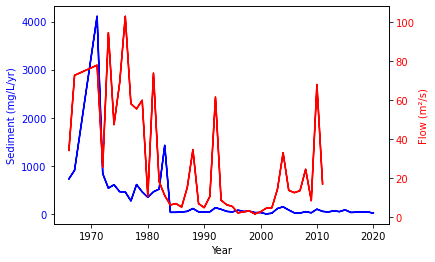

In [658]:
myplot(RiverData, 'blue', 'red')
plt.savefig('SSCFlow.jpg')

Sediment and precipitation have drastically declined since the 1970s

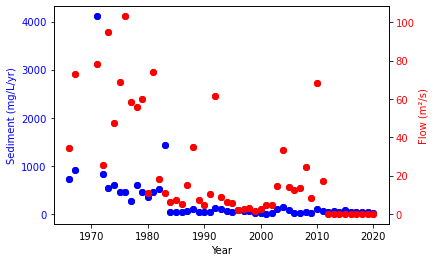

In [386]:

N=50
area = (30 * np.random.rand(N))**2

fig, ax1=plt.subplots()

x=1971.01    
ax1.scatter(NewRiverData.index, NewRiverData['SSC'], color='blue') 
ax1.set_xlabel('Year')
ax1.set_ylabel('Sediment (mg/L/yr)', color='blue')
ax1.tick_params('y', labelcolor='blue') 


ax2=ax1.twinx()
ax2.scatter(NewRiverData.index, NewRiverData['Flow'], color='red')
ax2.set_ylabel('Flow (m²/s)', color='red')
ax2.tick_params('y', labelcolor='red')

plt.savefig('RiverData1.jpg')


-----------------------------------------------------------
-----------------------------------------------------------

In [57]:
#MEAN, STANDARD DEVIATION & VARIANCE

In [66]:
np.mean(SSC)

283.7846153846155

In [67]:
np.std(SSC)
#SSC seems to be more spread out during this period.
    #The two points that are the furthest seemed to affect std.

609.044298942903

In [68]:
np.var(SSC)

#Two outlier are altering the data

370934.9580748521

In [69]:
np.mean(Flow)

28.23023255813952

In [71]:
np.std(Flow)

#Flow not constant through this period.
    

28.47636747545373

In [72]:
np.var(Flow)

#Data all over the place

810.9035045970792

In [166]:
def SSC_decades(mydata, istart):
    a=dec_avg=mydata.iloc[istart:istart+9,0]
    b=dec_avg=mydata.iloc[istart:istart+10,0]
    
    if istart == 2:
        return round(np.mean(a),1) 
        
    else:
        return round(mean(b),1)

In [337]:
seventies=SSC_decades(RiverData,2)
seventies

928.5

In [338]:
eigthies=SSC_decades(RiverData,11)
eigthies

307.0

In [339]:
nineties=SSC_decades(RiverData,21)
nineties

62.9

In [340]:
twothousand=SSC_decades(RiverData,32)
twothousand

57.4

In [341]:
TwentyTen=SSC_decades(RiverData,42)
TwentyTen

45.9

In [136]:
def flow_decades(mydata, istart):
    a=dec_avg=mydata.iloc[istart:istart+9,1]
    b=dec_avg=mydata.iloc[istart:istart+10,1]
    
    if istart == 2:
        return round(mean(a),1)
       
    
    else:
        return round(mean(b),1)
       

In [342]:
seventiesFlow=flow_decades(RiverData,2)
seventiesFlow

65.7

In [344]:
eigthiesFlow=flow_decades(RiverData,11)
eigthiesFlow

18.9

In [345]:
ninetiesFlow=flow_decades(RiverData,21)
ninetiesFlow

10.8

In [346]:
twothousandsFlow=flow_decades(RiverData,32)
twothousandsFlow

19.8

In [362]:
decades={'DecadesSSC':{'1970s':298,'1980s':307,'1990s':63,'2000s':57,'2010s':46},
        'DecadesFlow':{'1970s':66,'1980s':19,'1990s':11,'2000s':20}}

In [379]:
river_decadesdf=pd.DataFrame(decades)
river_decadesdf
river_decadesdf=river_decadesdf.fillna(0)
river_decadesdf



,DecadesSSC,DecadesFlow
1970s,298,66.0
1980s,307,19.0
1990s,63,11.0
2000s,57,20.0
2010s,46,0.0


In [366]:
river_decadesdf.to_csv('river_decades.csv')

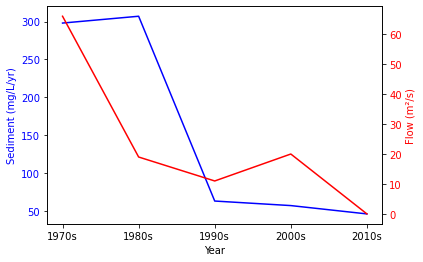

In [385]:
fig, ax1=plt.subplots()

    
ax1.plot(river_decadesdf.index, river_decadesdf['DecadesSSC'], color='blue') 
ax1.set_xlabel('Year')
ax1.set_ylabel('Sediment (mg/L/yr)', color='blue')
ax1.tick_params('y', labelcolor='blue')   

ax2=ax1.twinx()
ax2.plot(river_decadesdf.index, river_decadesdf['DecadesFlow'], color='red')
ax2.set_ylabel('Flow (m²/s)', color='red')
ax2.tick_params('y', labelcolor='red')

plt.savefig('RiverDecades.jpg')

___________________________________________________________________________________________________________________________
___________________________________________________________________________________________________________________________

In [ ]:
# PRECIPITATION

Here, I will introduced precipitation data from NOAA to see if there is a relationship with the drastic declined in flow in the delta

In [650]:
RainData=pd.read_csv('precipitation.csv', index_col='Year')
RainData

,Precipitation
Year,
1970,1.82
1971,1.92
1972,2.28
1973,2.06
1974,1.23
1975,1.99
1976,2.85
1977,1.83
1978,1.87


In [394]:
Rain=RainData['Precipitation']
Rain

Year
1970    1.82
1971    1.92
1972    2.28
1973    2.06
1974    1.23
1975    1.99
1976    2.85
1977    1.83
1978    1.87
1979    1.97
1980    1.51
1981    2.11
1982    1.75
1983    1.96
1984    2.80
1985    2.28
1986    1.92
1987    2.00
1988    1.60
1989    1.47
1990    1.31
1991    2.20
1992    2.21
1993    1.89
1994    1.67
1995    2.09
1996    1.99
1997    2.52
1998    1.38
1999    1.60
2000    1.15
2001    1.17
2002    1.97
2003    2.34
2004    2.06
2005    1.00
2006    1.51
2007    1.16
2008    2.66
2009    1.82
2010    2.54
2011    1.25
2012    1.48
2013    2.02
2014    1.99
2015    3.26
2016    1.58
2017    1.59
2018    1.60
2019    1.59
2020    1.55
Name: Precipitation, dtype: float64

In [395]:
np.mean(Rain)

1.8700000000000003

In [396]:
np.std(Rain)

0.467370617516385

In [397]:
np.var(Rain)

0.21843529411764703

In [621]:
Rain_trend = stats.linregress(RainData.index, RainData["Precipitation"])

-0.004676923076923074

In [ ]:
Rain=RainData['Precipitation']
Rain

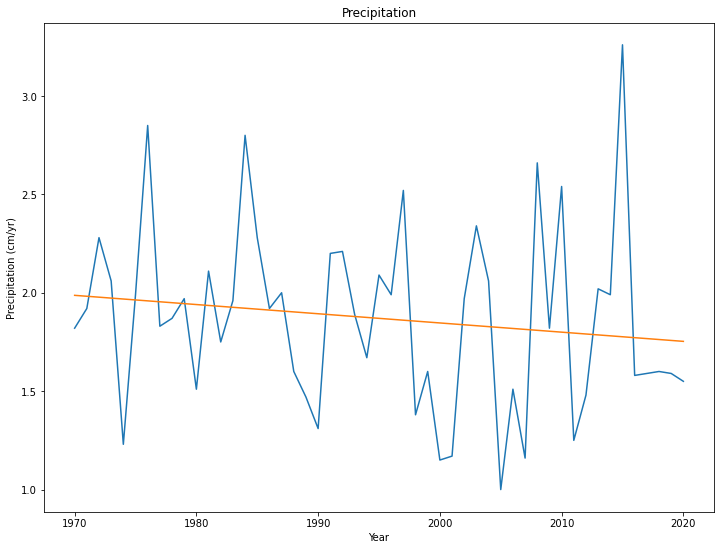

In [660]:
plt.figure(figsize=(12, 9))

plt.plot(RainData.index, RainData["Precipitation"],)
plt.plot(RainData.index, Rain_trend.slope*RainData.index + Rain_trend.intercept)
plt.title('Precipitation')
plt.xlabel('Year')
plt.ylabel('Precipitation (cm/yr)')

               
plt.savefig('precipitation.jpg')



In [455]:
def rain_decades(mydata, istart):
    a=dec_avg=mydata.iloc[istart:istart+9,1]
    b=dec_avg=mydata.iloc[istart:istart+10,1]
    
    if istart == 2:
        return round(mean(a),1)
       
    
    else:
        return round(mean(b),1)

In [483]:
def rain_decades(mydata, istart):
    dec_avg=mydata.iloc[istart:istart+10,0]
    
    return round(mean(dec_avg),1)
    
 

In [486]:
seventiesRain=rain_decades(RainData,0)
seventiesRain

2.0

In [488]:
eigthiesRain=rain_decades(RainData,11)
eigthiesRain

1.9

In [489]:
ninetiesRain=rain_decades(RainData,21)
ninetiesRain

1.9

In [490]:
twothousandsRain=rain_decades(RainData,31)
twothousandsRain

1.8

In [491]:
TwentyTenRain=rain_decades(RainData,41)
TwentyTenRain

1.8

_____________________________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________________________

In [ ]:
#COMPARISON RIVER DATA AND PRECIPITATIPON 

In [493]:
decades={'DecadesSSC':{'1970s':298,'1980s':307,'1990s':63,'2000s':57,'2010s':46},
        'DecadesFlow':{'1970s':66,'1980s':19,'1990s':11,'2000s':20},
         'DecadesRain':{'1970s':2.0,'1980s':1.9,'1990s':1.9,'2000s':1.8,'2010s':1.8}}

In [600]:
river_decadesdf=pd.DataFrame(decades)
river_decadesdf
river_decadesdf=river_decadesdf.fillna(0)
river_decadesdf

,DecadesSSC,DecadesFlow,DecadesRain
1970s,298,66.0,2.0
1980s,307,19.0,1.9
1990s,63,11.0,1.9
2000s,57,20.0,1.8
2010s,46,0.0,1.8


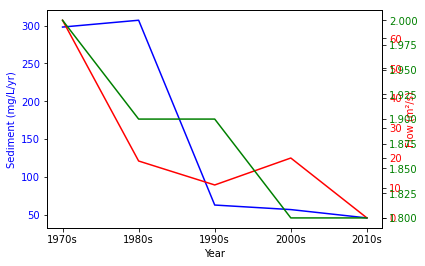

In [656]:
fig, ax1=plt.subplots()

    
ax1.plot(river_decadesdf.index, river_decadesdf['DecadesSSC'], color='blue') 
ax1.set_xlabel('Year')
ax1.set_ylabel('Sediment (mg/L/yr)', color='blue')
ax1.tick_params('y', labelcolor='blue')   

ax2=ax1.twinx()
ax2.plot(river_decadesdf.index, river_decadesdf['DecadesFlow'], color='red')
ax2.set_ylabel('Flow (m²/s)', color='red')
ax2.tick_params('y', labelcolor='red')

ax3=ax1.twinx()
ax3.plot(river_decadesdf.index, river_decadesdf['DecadesRain'], color='green')
ax3.set_xlabel('Precipitation (cm/yr)', color='green')
ax3.tick_params(labelcolor='green')
ax3.xaxis.tick_top()

               
plt.savefig('RiverDecades.jpg')


In [ ]:
# I've tried multuple methods to fix the graph, but every method that I find online yields an error message here. 

In [628]:
Rain_trend = stats.linregress(RainData.index, RainData["Precipitation"])
Rain_trend

LinregressResult(slope=-0.004676923076923074, intercept=11.200461538461532, rvalue=-0.1472973291342559, pvalue=0.30231822907091405, stderr=0.004486463282464367)

In [671]:
Flow_trend = stats.linregress(NewRiverData.index, NewRiverData["Flow"])
Flow_trend

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

In [672]:
SSC_trend = stats.linregress(NewRiverData.index, NewRiverData["SSC"])
SSC_trend

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

I tried solving this issues by deleting the NaN values from my data, but I kept getting the same results. I planned on having a more profound statistical analysis of my data, but it is not possible. 

In [ ]:
#PERCENTAGE DECLINES IN ALL THREE DATASETS

River Data
       DecadesSSC  DecadesFlow  DecadesRain
1970s         298         66.0          2.0
1980s         307         19.0          1.9
1990s          63         11.0          1.9
2000s          57         20.0          1.8
2010s          46          0.0          1.8
% River Data:
       DecadesSSC  DecadesFlow  DecadesRain
1970s   -0.029316     2.473684     0.052632
1980s    3.873016     0.727273     0.000000
1990s    0.105263    -0.450000     0.055556
2000s    0.239130          inf     0.000000
2010s         NaN          NaN          NaN


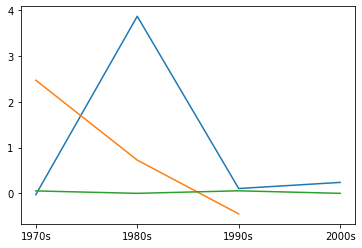

In [649]:


print("River Data");

print(river_decadesdf);

print("% River Data:")

decades = river_decadesdf.pct_change(periods=-1);

print(decades);

plt.plot(decades)


Mean precipitation has declined .2 in the last 4 decades. Although it may seem as a minor decline, it can play a major role in the overall reduction of water flowing to the Rio Grande Delta.

In [674]:
RiverDataFrame = pd.DataFrame(data=river_decadesdf)
print("Dataset Values:")
print(RiverDataFrame)

# Calculate descriptive statistics for the dataframe
statistics = RiverDataFrame.describe();

print("Descriptive statistics for River Data:")
print(statistics)

Dataset Values:
       DecadesSSC  DecadesFlow  DecadesRain
1970s         298         66.0          2.0
1980s         307         19.0          1.9
1990s          63         11.0          1.9
2000s          57         20.0          1.8
2010s          46          0.0          1.8
Descriptive statistics for River Data:
       DecadesSSC  DecadesFlow  DecadesRain
count    5.000000     5.000000     5.000000
mean   154.200000    23.200000     1.880000
std    135.553311    25.232915     0.083666
min     46.000000     0.000000     1.800000
25%     57.000000    11.000000     1.800000
50%     63.000000    19.000000     1.900000
75%    298.000000    20.000000     1.900000
max    307.000000    66.000000     2.000000


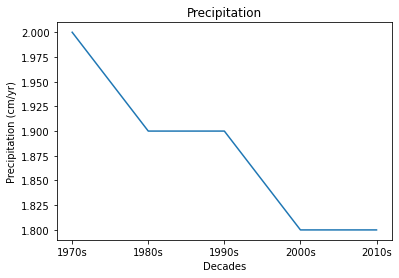

In [685]:


fig, ax = plt.subplots()
ax.plot(river_decadesdf.index, river_decadesdf['DecadesRain'])
ax.set(xlabel='Decades', ylabel='Precipitation (cm/yr)',
       title='Precipitation')

fig.savefig("Rain.png")
plt.show()




In [670]:
fig, ax1=plt.subplots()

    
ax1.plot(river_decadesdf.index, river_decadesdf['DecadesFlow'], color='blue') 
ax1.set_xlabel('Year')
ax1.set_ylabel('Flow (m²/s)', color='blue')
ax1.tick_params('y', labelcolor='blue')   

ax2=ax1.twinx()
ax2.plot(river_decadesdf.index, river_decadesdf['DecadesRain'], color='green')

ax2.set_xlabel('Year')
ax2.set_ylabel('Precipitation (cm/yr)', color='green')
ax2.tick_params('y', labelcolor='green')

ax.legend(river_decadesdf[],['first', 'second'])
plt.title('Flow v Precipitation')
plt.savefig('RainFlow.jpg')

SyntaxError: invalid syntax (<ipython-input-670-3961becd2bc0>, line 16)

They follow a similar pattern, but it does not seem to be similar. There are areas where they seem to correlate, but it is not very clear. 

________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________

In [ ]:
#MAP

In [245]:
fpath =config['data_dir'] + '/Users/edoardodavila/Downloads/ne_110m_rivers_lake_centerlines/ne_110m_rivers_lake_centerlines.shp'

In [ ]:
fpath

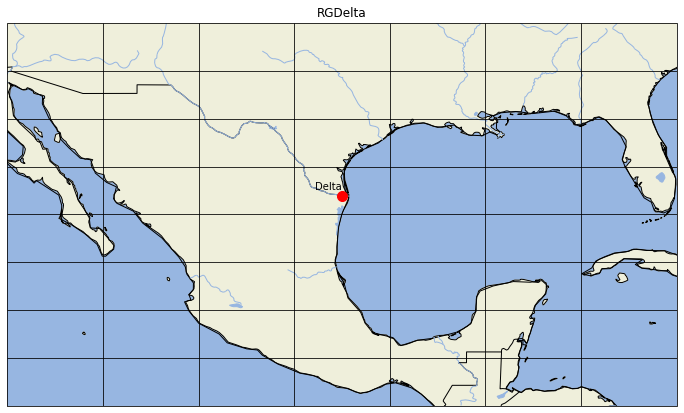

In [327]:
plt.figure(figsize=(12, 9))

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('RGDelta')
ax.set_extent([-80,-115,35,15], ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(color='black')

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)


plt.plot(-97.5110, 25.9815, markersize=10, marker='o', color='red')
plt.text(-97.5110, 26.2815, 'Delta', horizontalalignment='right', transform=ccrs.PlateCarree())
plt.savefig('delta.png')
plt.show()